In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Sam-r-ai/Music_Grouping_Via_Embeddings/refs/heads/main/2021%20-%202022%20music%20data%20-%20Sheet1.csv")  

In [2]:
#NORMALIZE FEATURES
from sklearn.preprocessing import StandardScaler

# Define mappings
key_mapping = {
    'C': 0,
    'C#': 1, 'Db': 1,
    'D': 2,
    'D#': 3, 'Eb': 3,
    'E': 4,
    'F': 5,
    'F#': 6, 'Gb': 6,
    'G': 7,
    'G#': 8, 'Ab': 8,
    'A': 9,
    'A#': 10, 'Bb': 10,
    'B': 11
}
mode_mapping = {
    'major': 1,
    'minor': 0
}

# Convert keys and modes to numerical values
df.loc[:, 'key'] = df['keys'].map(key_mapping)
df.loc[:, 'mode'] = df['modes'].map(mode_mapping)

# Drop unmapped or missing values
if df[['key', 'mode']].isnull().any().any():
    print("Warning: Some keys or modes could not be mapped. Dropping these rows.")
    df = df.dropna(subset=['key', 'mode'])

# Select features
features = ['danceability', 'key', 'mode', 'acousticness', 'duration_ms', 
            'energy', 'instrumentalness', 'liveness', 'loudness', 
            'popularity', 'speechiness', 'tempo', 'valence']

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

print("Features normalized successfully!")



Features normalized successfully!


In [3]:
#USE PCA TO REDUCE DIMENSIONS
from sklearn.decomposition import PCA

# Reduce dimensions to 3 for visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

print(f"Explained variance by PCA: {pca.explained_variance_ratio_}")


Explained variance by PCA: [0.18698647 0.13477981 0.11696036]


In [4]:
#BUILD EMBEDDINGS
# The embeddings are simply the scaled features
embeddings = scaled_features
print(f"Generated embeddings with shape: {embeddings.shape}")


Generated embeddings with shape: (62, 13)


In [5]:
#ClUSTER SONGS USING K-MEANS
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
df['cluster'] = kmeans.fit_predict(embeddings)

print("Songs clustered into groups!")


Songs clustered into groups!


/home/jgcheung/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


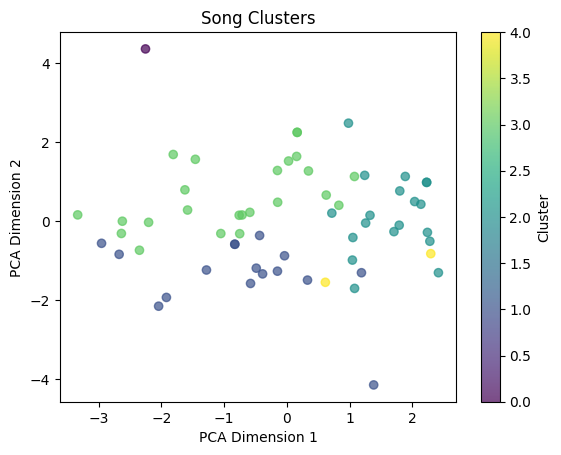

In [6]:
#Visualize Clusters 
import matplotlib.pyplot as plt

# Plot clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.title('Song Clusters')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [7]:
#VISUALIZE CLUSTER
for cluster in df['cluster'].unique():
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster][['name', 'artist']].head())


Cluster 2:
                          name      artist
0  Levitating featuring Dababy    Dua Lipa
1               Break My Heart    Dua Lipa
2              Blinding Lights  The Weeknd
3                         Mood    24kGoldn
4                       Say So    Doja Cat
Cluster 1:
                                            name          artist
5                                     All I Want  Olivia Rodrigo
9                                   Life Goes On             BTS
11  Just for a Moment - From High School Musical  Olivia Rodrigo
13                                           pov   Ariana Grande
15                                   Without You   The Kid Laroi
Cluster 3:
               name          artist
6   Drivers License  Olivia Rodrigo
10       Party Girl  StaySolidRocky
14       Heat Waves   Glass Animals
17         Go Crazy     Chris Brown
19            34+35   Ariana Grande
Cluster 4:
       name         artist
8   Friends  Justin Bieber
52   Sativa     Jhene Aiko
Cluster 0:


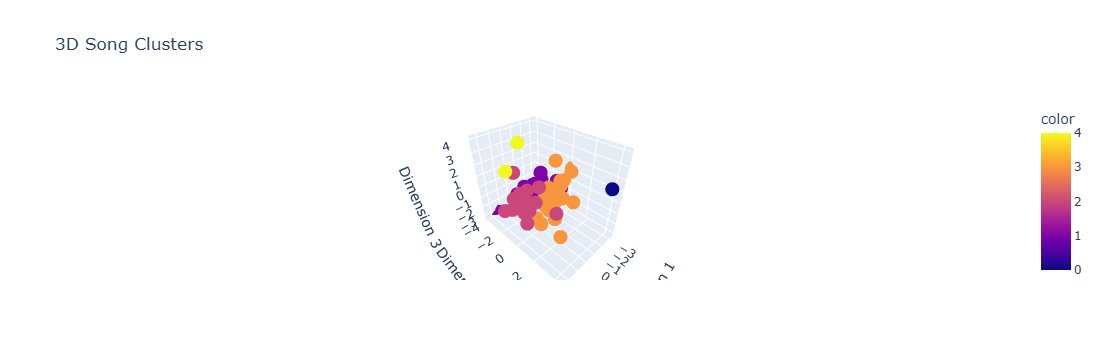

In [9]:
import plotly.express as px

# Create a 3D scatter plot with hover information
fig = px.scatter_3d(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    z=reduced_features[:, 2],
    color=df['cluster'],  # Color by cluster
    title="3D Song Clusters",
    labels={'x': 'Dimension 1', 'y': 'Dimension 2', 'z': 'Dimension 3'},
    hover_data={'name': df['name'], 'artist': df['artist']}  # Add song name and artist to hover
)

# Show interactive plot
fig.show()


In [ ]:
#When to Use Each Method
#PCA: Best for quick results and understanding linear relationships in data.
#t-SNE: Better for revealing non-linear cluster structures.
#UMAP: Faster and effective for both large and small datasets.